In [37]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure, img_as_ubyte
from skimage.io import imread, imsave
from skimage.color import rgb2gray


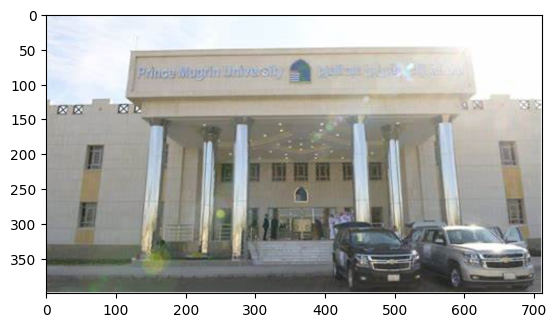

In [38]:
image = imread('Picture1.jpg')
plt.imshow(image)

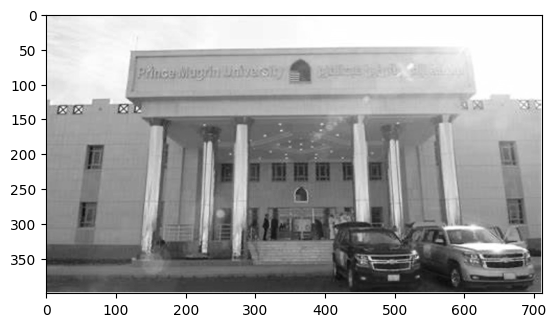

In [39]:
gray_image = rgb2gray(image)
plt.imshow(gray_image, cmap='gray')

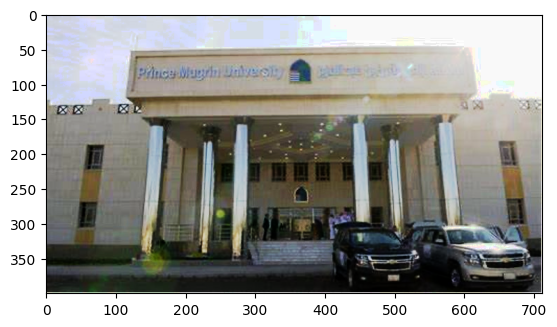

In [40]:
# Histogram Equalization
image_eq = exposure.equalize_hist(image)
plt.imshow(image_eq)

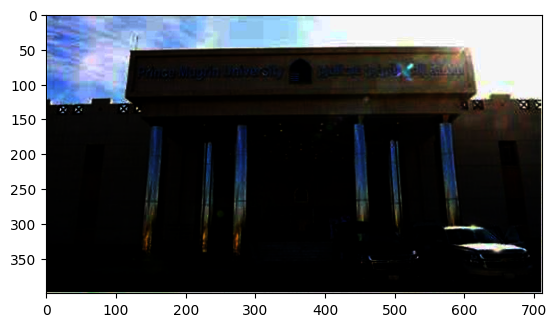

In [41]:
# Gamma Correction
gamma_corrected = exposure.adjust_gamma(image, gamma=9)
plt.imshow(gamma_corrected)

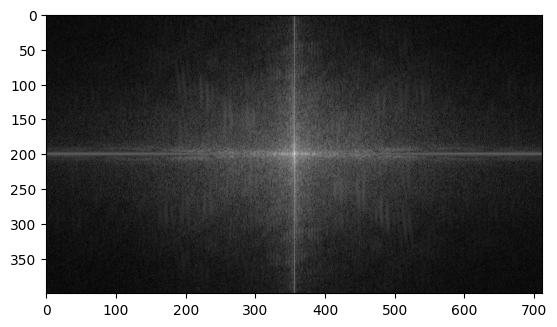

In [42]:
# 2D FFT
f_image = np.fft.fft2(gray_image)
fshift = np.fft.fftshift(f_image)
plt.imshow(np.log(1 + np.abs(fshift)), cmap='gray')

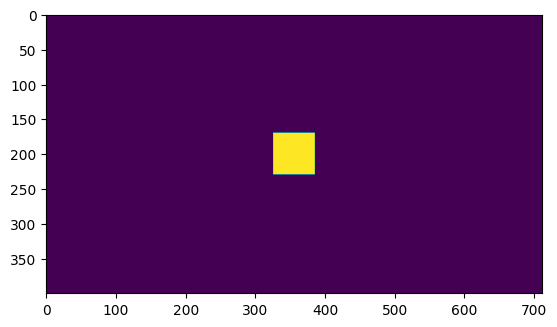

In [43]:
# Low-pass filter
rows, cols = gray_image.shape
crow, ccol = rows // 2, cols // 2
low_pass = np.zeros((rows, cols), np.uint8)
low_pass[crow-30:crow+30, ccol-30:ccol+30] = 1
plt.imshow(low_pass)

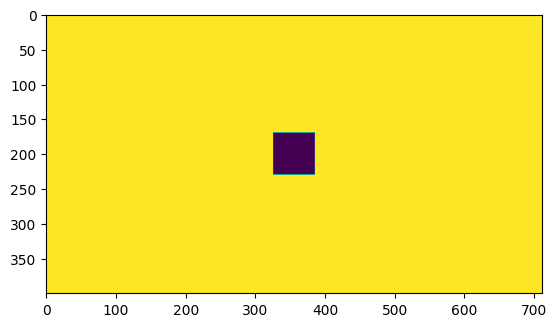

In [44]:
# High-pass filter
high_pass = np.ones((rows, cols), np.uint8)
high_pass[crow-30:crow+30, ccol-30:ccol+30] = 0
plt.imshow(high_pass)

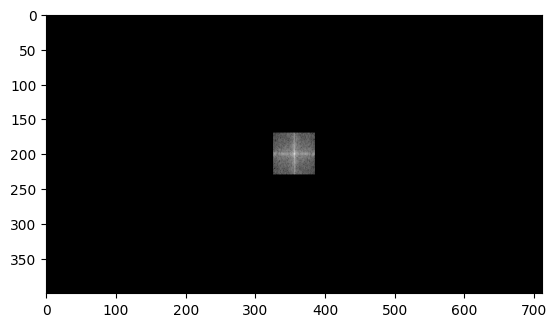

In [45]:
# Apply filters
fshift_low = fshift * low_pass
fshift_high = fshift * high_pass
plt.imshow(np.log(1 + np.abs(fshift_low)), cmap='gray')

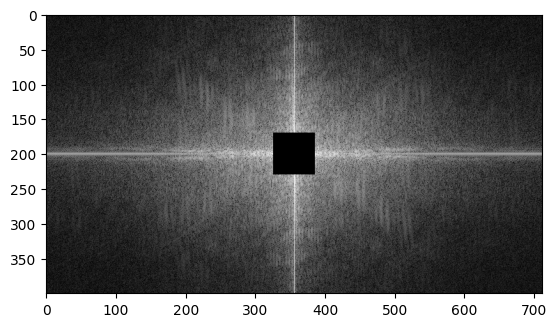

In [46]:
plt.imshow(np.log(1 + np.abs(fshift_high)), cmap='gray')

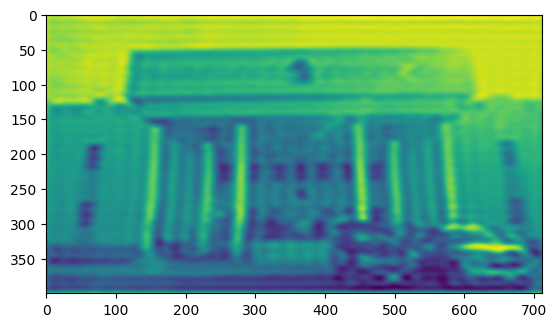

In [47]:
# Inverse FFT
img_back_low = np.fft.ifft2(np.fft.ifftshift(fshift_low))
img_back_low = np.abs(img_back_low)

img_back_high = np.fft.ifft2(np.fft.ifftshift(fshift_high))
img_back_high = np.abs(img_back_high)

plt.imshow(img_back_low)


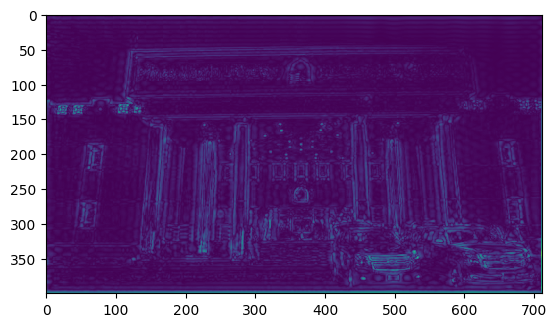

In [48]:
plt.imshow(img_back_high)

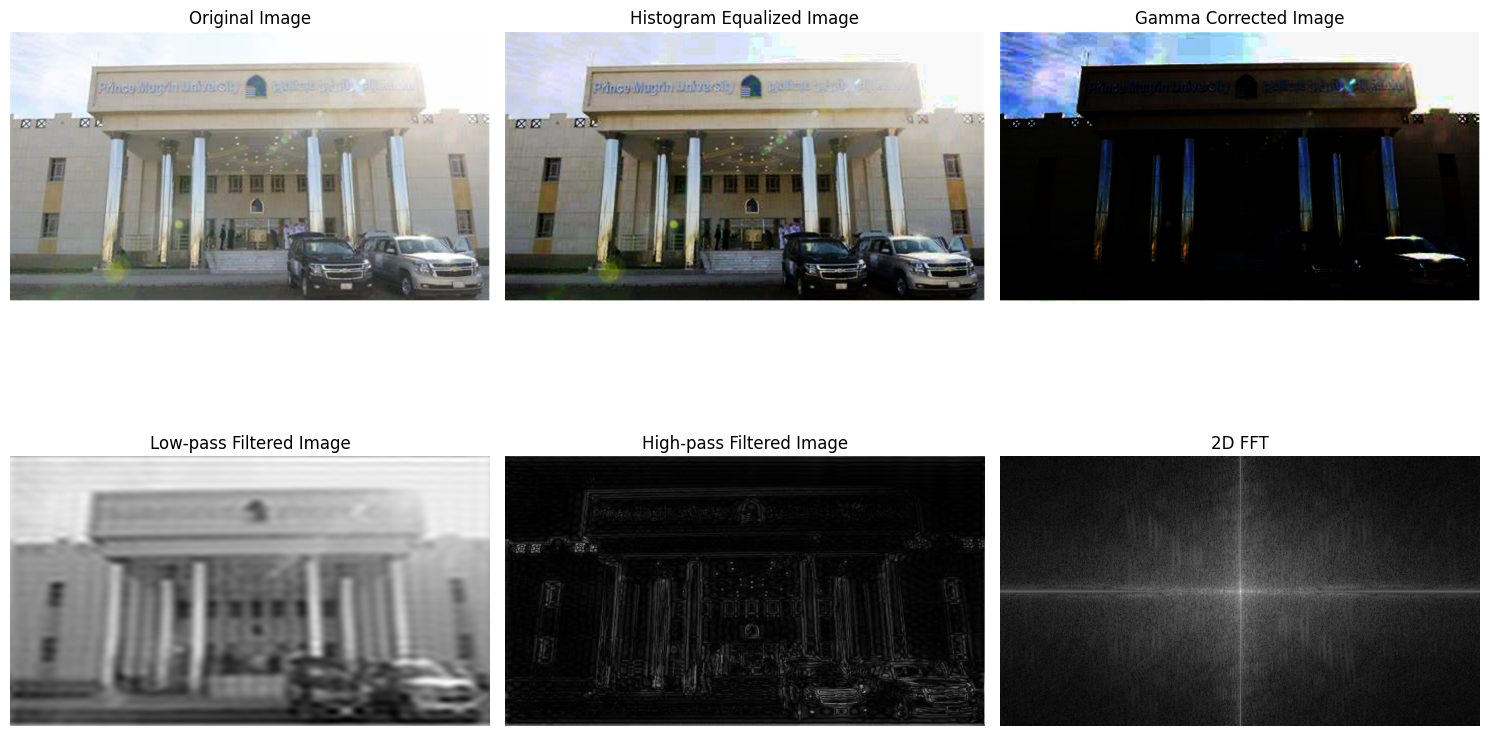

In [49]:
# Display results
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0, 0].imshow(image)
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

ax[0, 1].imshow(image_eq, cmap='gray')
ax[0, 1].set_title('Histogram Equalized Image')
ax[0, 1].axis('off')

ax[0, 2].imshow(gamma_corrected, cmap='gray')
ax[0, 2].set_title('Gamma Corrected Image')
ax[0, 2].axis('off')

ax[1, 0].imshow(img_back_low, cmap='gray')
ax[1, 0].set_title('Low-pass Filtered Image')
ax[1, 0].axis('off')

ax[1, 1].imshow(img_back_high, cmap='gray')
ax[1, 1].set_title('High-pass Filtered Image')
ax[1, 1].axis('off')

ax[1, 2].imshow(np.log(1 + np.abs(fshift)), cmap='gray')
ax[1, 2].set_title('2D FFT')
ax[1, 2].axis('off')

plt.tight_layout()
plt.show()

### Documentation:


Okay, so first, I load the picture into the program. Then I check if the picture is in the right format for processing. After that, I use a method called ‘histogram equalization’ to make the dark and bright parts of the picture more balanced. Then I apply something called ‘gamma correction,’ which helps to make the picture either brighter or darker depending on what I want.

Next, I turn the picture into black and white so I can do more detailed changes. I apply two filters: a low-pass filter, which blurs the picture and removes small details, and a high-pass filter, which makes the edges and sharp parts stand out more. After applying these filters, I reverse the changes so I can see how the picture looks after the filters. In the end, I show both the original and the improved pictures on the screen.